<a href="https://colab.research.google.com/github/hpsuresh12345/Python-code/blob/master/SentimentAnalysis_Assignment2_03Sep2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [0]:
train  = pd.read_csv('TweetSent.csv')

In [0]:
train.head()

,Tweet,Category
0,Not Available,negative
1,IOS 9 App Transport Security. Mm need to check...,neutral
2,"Mar if you have an iOS device, you should down...",neutral
3,@jimmie_vanagon my phone does not run on lates...,negative
4,Not sure how to start your publication on iOS?...,positive


In [0]:
train.describe()

,Tweet,Category
count,5968,5968
unique,5418,4
top,Not Available,positive
freq,546,2888


Text PreProcessing and Cleaning

Data Inspection

check out a few neutral tweets

In [0]:
train[train['Category'] == 'positive'].head(10)

,Tweet,Category
4,Not sure how to start your publication on iOS?...,positive
10,Parkrun app for iOS downloaded Where have you ...,positive
11,"Today @YouTubeGaming launches, with apps for i...",positive
12,Got a project you want to work on? Need help w...,positive
13,"Met with iOS Developer today. We may have a ""g...",positive
14,#CrossSkyHigh is going IOS #saturday. For now ...,positive
15,What's the best way to get audio recordings fr...,positive
16,Five Great Free Apps and Games for iOS - Augus...,positive
18,See news through the eyes of real people &amp;...,positive
19,Siri knows all about #Apple's iOS event on the...,positive


check out a few positive tweets

In [0]:
train[train['Category'] == 'neutral'].head(10)

,Tweet,Category
1,IOS 9 App Transport Security. Mm need to check...,neutral
2,"Mar if you have an iOS device, you should down...",neutral
5,"Two Dollar Tuesday is here with Forklift 2, Qu...",neutral
6,If you're not already signed up to test my iOS...,neutral
7,"YouTube Gaming Officially Launches On Web, And...",neutral
8,YouTube Gaming Launches Tomorrow with iOS and ...,neutral
9,@astrill Yashan from BBC @bbcchinese the VPN a...,neutral
17,@clayrussell @Nostradamion looks interesting b...,neutral
24,Huawei Watch Pre-Order Suggests Android Wear C...,neutral
25,SpeedeNews: Rumor: Android Wear will soon work...,neutral


In [0]:
train[train['Category'] == 'negative'].head(10)

,Tweet,Category
0,Not Available,negative
3,@jimmie_vanagon my phone does not run on lates...,negative
29,@_tomcc @bartwerf please stop walking and work...,negative
36,"@DeltaAssist yes, I asked an attendant to prin...",negative
78,Not Available,negative
91,ok inbox on iOS has a pretty animation for the...,negative
100,Lost my iPad for the 2nd time today,negative
112,I'm at my follow limit. Rude. I will go on my ...,negative
130,are yall really mad that he's paying $200 to f...,negative
133,When you have 3 1/2 tests tomorrow and a lab t...,negative


dimensions of the train and test dataset.

In [0]:
train.shape

(5968, 2)

In the train dataset, we have 2,242 (~7%) tweets labeled as racist or sexist, and 29,720 (~93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

In [0]:
train["Category"].value_counts()

positive    2888
neutral     2123
negative     956
Tweet          1
Name: Category, dtype: int64

distribution of length of the tweets, in terms of words, in both train and test data.

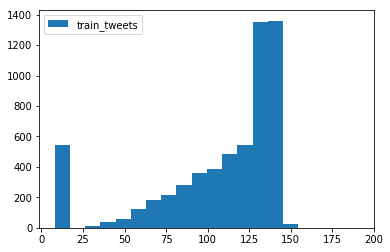

In [0]:
length_train = train['Tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.legend()
plt.show()

Data Cleaning

Given below is a user-defined function to remove unwanted text patterns from the tweets.

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt
  

1. Removing Twitter Handles (@user)

In [0]:
train['tidy_tweet'] = np.vectorize(remove_pattern)(train['Tweet'], "@[\w]*") 
train.head()

,Tweet,Category,tidy_tweet
0,Not Available,negative,Not Available
1,IOS 9 App Transport Security. Mm need to check...,neutral,IOS 9 App Transport Security. Mm need to check...
2,"Mar if you have an iOS device, you should down...",neutral,"Mar if you have an iOS device, you should down..."
3,@jimmie_vanagon my phone does not run on lates...,negative,my phone does not run on latest IOS which may...
4,Not sure how to start your publication on iOS?...,positive,Not sure how to start your publication on iOS?...


2. Removing Punctuations, Numbers, and Special Characters

In [0]:
train['tidy_tweet'] = train['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
train.head(10)

,Tweet,Category,tidy_tweet
0,Not Available,negative,Not Available
1,IOS 9 App Transport Security. Mm need to check...,neutral,IOS App Transport Security Mm need to check...
2,"Mar if you have an iOS device, you should down...",neutral,Mar if you have an iOS device you should down...
3,@jimmie_vanagon my phone does not run on lates...,negative,my phone does not run on latest IOS which may...
4,Not sure how to start your publication on iOS?...,positive,Not sure how to start your publication on iOS ...
5,"Two Dollar Tuesday is here with Forklift 2, Qu...",neutral,Two Dollar Tuesday is here with Forklift Qu...
6,If you're not already signed up to test my iOS...,neutral,If you re not already signed up to test my iOS...
7,"YouTube Gaming Officially Launches On Web, And...",neutral,YouTube Gaming Officially Launches On Web And...
8,YouTube Gaming Launches Tomorrow with iOS and ...,neutral,YouTube Gaming Launches Tomorrow with iOS and ...
9,@astrill Yashan from BBC @bbcchinese the VPN a...,neutral,Yashan from BBC the VPN access on IOS may be...


3. Removing Short Words



In [0]:
train['tidy_tweet'] = train['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [0]:
train.head()

,Tweet,Category,tidy_tweet
0,Not Available,negative,Available
1,IOS 9 App Transport Security. Mm need to check...,neutral,Transport Security need check party network su...
2,"Mar if you have an iOS device, you should down...",neutral,have device should download http uDnD
3,@jimmie_vanagon my phone does not run on lates...,negative,phone does latest which account problem other ...
4,Not sure how to start your publication on iOS?...,positive,sure start your publication live helping with ...


4. Text Normalization

In [0]:
tokenized_tweet = train['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [0]:
tokenized_tweet.head()


0                                          [Available]
1    [Transport, Security, need, check, party, netw...
2         [have, device, should, download, http, uDnD]
3    [phone, does, latest, which, account, problem,...
4    [sure, start, your, publication, live, helping...
Name: tidy_tweet, dtype: object

In [0]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [0]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
train['tidy_tweet'] = tokenized_tweet

WordCloud

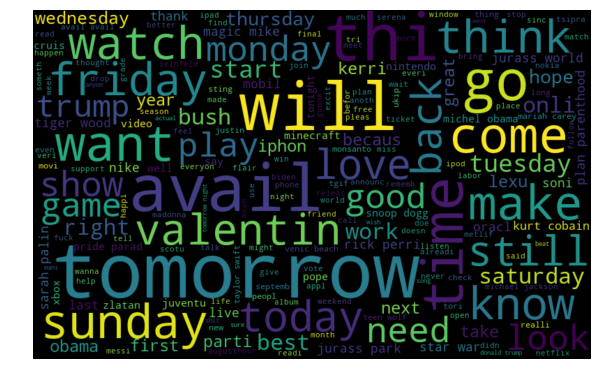

In [0]:
all_words = ' '.join([text for text in train['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Words in non racist/sexist tweets

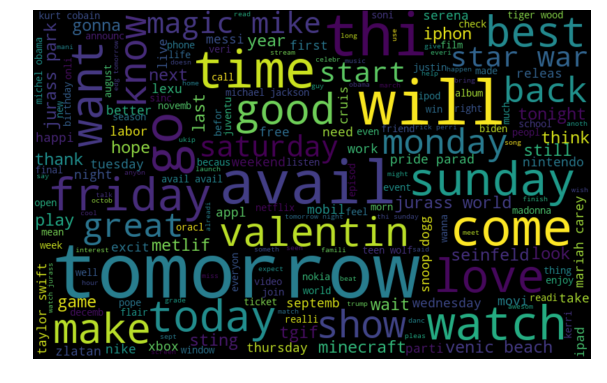

In [0]:
positive_words =' '.join([text for text in train['tidy_tweet'][train['Category'] == 'positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

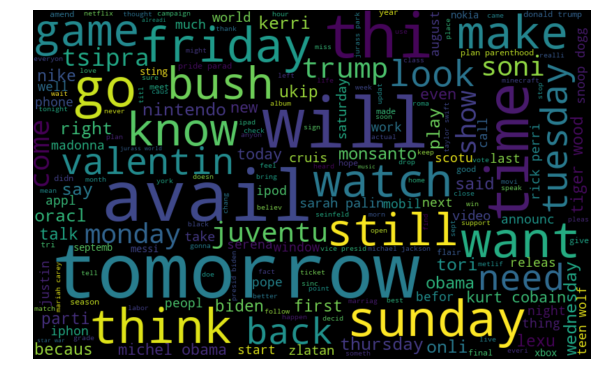

In [0]:
neutral_words =' '.join([text for text in train['tidy_tweet'][train['Category'] == 'neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

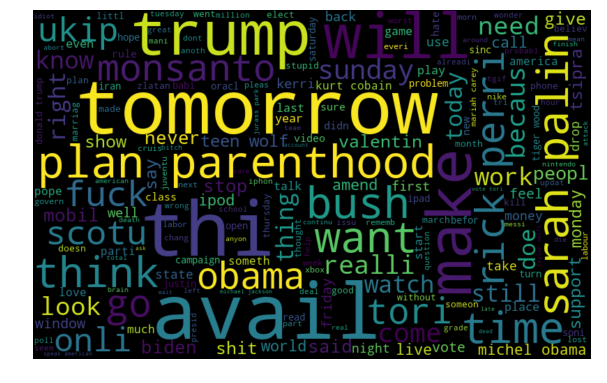

In [0]:
negative_words =' '.join([text for text in train['tidy_tweet'][train['Category'] == 'negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Understanding the impact of Hashtags on tweets sentiment

In [0]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [0]:
# extracting hashtags from positive,negative and neutral tweets

HT_positive = hashtag_extract(train['tidy_tweet'][train['Category'] == 'positive'])
HT_neutral = hashtag_extract(train['tidy_tweet'][train['Category'] == 'neutral'])
HT_negative = hashtag_extract(train['tidy_tweet'][train['Category'] == 'negative'])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_neutral = sum(HT_neutral,[])
HT_negative = sum(HT_negative,[])

Positive Tweets

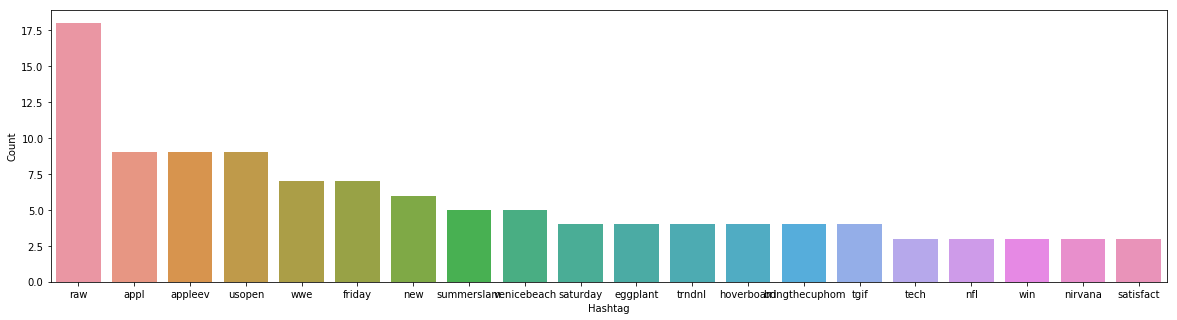

In [0]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Neutral Tweets

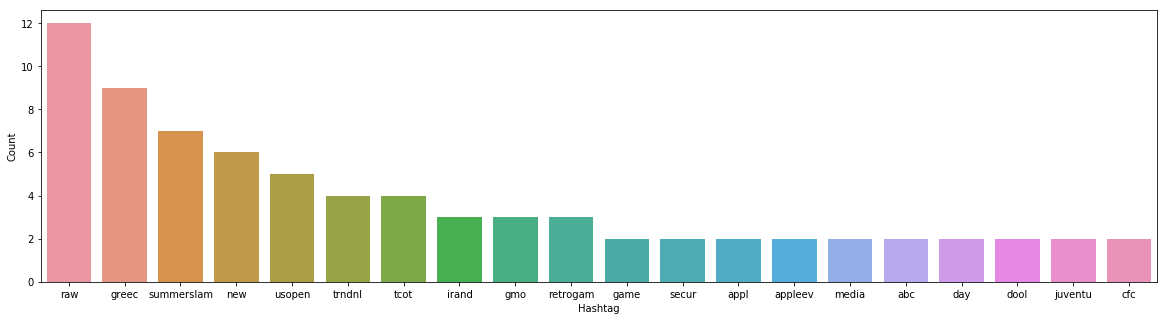

In [0]:
b = nltk.FreqDist(HT_neutral)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(20,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

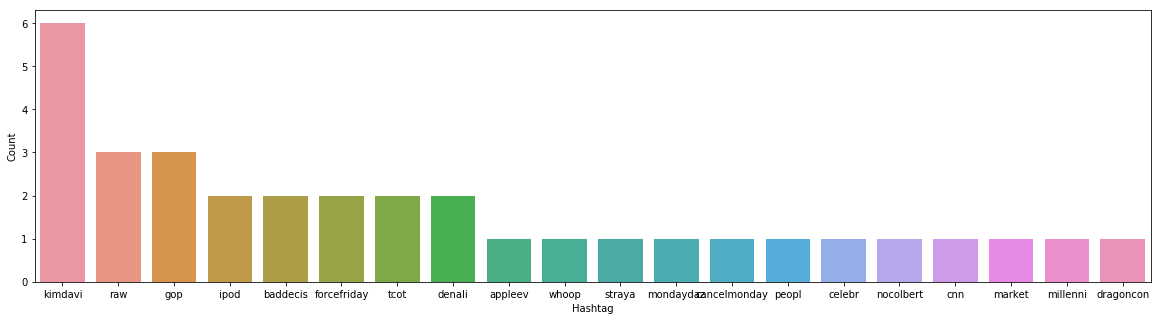

In [0]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(20,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

Extracting Features from Cleaned Tweets

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim


Bag-of-Words Features

In [0]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train['tidy_tweet'])
bow.shape

(5968, 1000)

Word Embeddings

In [0]:
tokenized_tweet = train['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tidy_tweet']), epochs=20)

(964776, 1223060)

Preparing Vectors for Tweets

In [0]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

# Preparing word2vec feature set

In [0]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(5968, 200)

Doc2Vec Embedding

In [0]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [0]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [0]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweet

In [0]:
labeled_tweets[:6]

[LabeledSentence(words=['avail'], tags=['tweet_0']),
 LabeledSentence(words=['transport', 'secur', 'need', 'check', 'parti', 'network', 'support', 'http', 'fmtcfuadgj'], tags=['tweet_1']),
 LabeledSentence(words=['have', 'devic', 'should', 'download', 'http', 'udnd'], tags=['tweet_2']),
 LabeledSentence(words=['phone', 'doe', 'latest', 'which', 'account', 'problem', 'other', 'time', 'replac'], tags=['tweet_3']),
 LabeledSentence(words=['sure', 'start', 'your', 'public', 'live', 'help', 'with', 'anyth', 'session', 'today', 'friday', 'http', 'kpqqgjjh'], tags=['tweet_4']),
 LabeledSentence(words=['dollar', 'tuesday', 'here', 'with', 'forklift', 'quickkey', 'suit', 'page', 'just', 'today', 'http', 'bnmfoeacw'], tags=['tweet_5'])]

Model Building

Lexiconbased, 
Naive Bayes,
Kmeans


# 1.Lexicon based using bag of words

In [88]:
#Download required text processing packages 
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# 2.NaiveBayesClassifier


In [95]:
from sklearn.naive_bayes import MultinomialNB
clf= MultinomialNB()
clf.fit(xtrain_bow, ytrain)

score = clf.score(xvalid_bow, yvalid)
score

0.5689558905639308

In [96]:
y_pred_class = clf.predict(xvalid_bow)

# print the confusion matrix

from sklearn import metrics
metrics.confusion_matrix(yvalid, y_pred_class)

array([[  0,   0,   0,   1],
       [  0, 104,  88,  88],
       [  0, 103, 232, 314],
       [  0,  42, 136, 683]])

# 3. kmeans

In [99]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 10
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(xtrain_bow)
kmeans_clusters = kmeans.predict(xtrain_bow)
kmeans_distances = kmeans.transform(xtrain_bow)
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
print(kmeans_clusters)
print(kmeans)

for i in range(num_clusters):
    print("Cluster %d:" % i)
    for j in sorted_centroids[i, :5]:
        print(' %s' % [j])
    print()
    
prediction = kmeans.predict(xvalid_bow)

[5 5 5 ... 5 3 5]
MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
                init_size=1000, max_iter=1000, max_no_improvement=10,
                n_clusters=10, n_init=1, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=False)
Cluster 0:
 [322]
 [520]
 [946]
 [881]
 [476]

Cluster 1:
 [762]
 [933]
 [955]
 [966]
 [606]

Cluster 2:
 [97]
 [565]
 [526]
 [718]
 [907]

Cluster 3:
 [881]
 [456]
 [955]
 [886]
 [870]

Cluster 4:
 [333]
 [872]
 [987]
 [647]
 [978]

Cluster 5:
 [886]
 [57]
 [457]
 [870]
 [498]

Cluster 6:
 [317]
 [127]
 [841]
 [870]
 [882]

Cluster 7:
 [409]
 [870]
 [886]
 [331]
 [166]

Cluster 8:
 [529]
 [120]
 [409]
 [498]
 [457]

Cluster 9:
 [473]
 [159]
 [409]
 [16]
 [792]

